In [1]:
# import required modules:
import matplotlib.pyplot as plt # to make plots
import numpy as np # for array manipulation and math functions
import scipy.signal as scs # for signal analysis
import glob # for finding files
import os as os
import warnings
import array as arr
from scipy import optimize
from scipy.optimize import curve_fit
# import fit models from the lmfit package
from lmfit.models import ExponentialModel, GaussianModel, PolynomialModel
# insert the path to your Data here5
datapath = "./Daten/"
# Konstanten
c0                  = 299792458             # Vakuum Lichtgeschwindigkeit
#h                   = 6.626e-34             # Plank'sches Wirkungsquantum
hbar                = 6.626e-34/(2*np.pi)   # Reduzierte Plank-Konstante
e                  = 1.6022e-19            # Elektronenvolt
def Fehler_I(I_0,I,Ier,I_0er,U):
    h=0
    for u in U:
        if (I[h]-I_0)!=0.0:
            Ier[h]=np.sqrt((0.5*Ier[h]*0.001/np.sqrt((I[h]-I_0)*0.001))**2+(0.5*I_0er*0.001/np.sqrt((I[h]-I_0)*0.001))**2)
        else:
            Ier[h]=np.sqrt((Ier[h]+I_0er)*0.01)
        h=h+1
    return Ier

[[0.000e+00 5.160e+00]
 [5.100e+01 4.870e+00]
 [1.480e+02 4.330e+00]
 [1.000e+02 4.600e+00]
 [2.020e+02 3.980e+00]
 [3.020e+02 3.450e+00]
 [4.020e+02 3.000e+00]
 [5.110e+02 2.350e+00]
 [6.100e+02 1.910e+00]
 [7.040e+02 1.580e+00]
 [8.080e+02 1.170e+00]
 [1.016e+03 6.300e-01]
 [1.204e+03 3.400e-01]
 [1.516e+03 7.300e-02]
 [1.694e+03 8.200e-03]
 [2.000e+03 2.900e-03]
 [2.346e+03 2.000e-03]
 [2.800e+03 2.200e-03]
 [0.000e+00 4.960e+00]
 [2.440e+02 3.550e+00]
 [5.040e+02 2.240e+00]
 [7.410e+02 1.320e+00]
 [9.920e+02 6.300e-01]
 [1.258e+03 2.670e-01]
 [1.498e+03 8.000e-02]
 [1.713e+03 6.800e-03]
 [2.135e+03 3.600e-03]
 [2.803e+03 3.100e-03]]
[array([0.   , 0.051, 0.148, 0.1  , 0.202, 0.302, 0.402, 0.511, 0.61 ,
       0.704, 0.808, 1.016, 1.204, 1.516, 1.694, 2.   , 2.346, 2.8  ,
       0.   , 0.244, 0.504, 0.741, 0.992, 1.258, 1.498, 1.713, 2.135,
       2.803]), array([0.   , 0.109, 0.256, 0.4  , 0.602, 0.804, 1.021, 1.153, 1.295,
       1.385, 1.471, 2.016, 2.801, 0.   , 0.203, 0.395, 0.

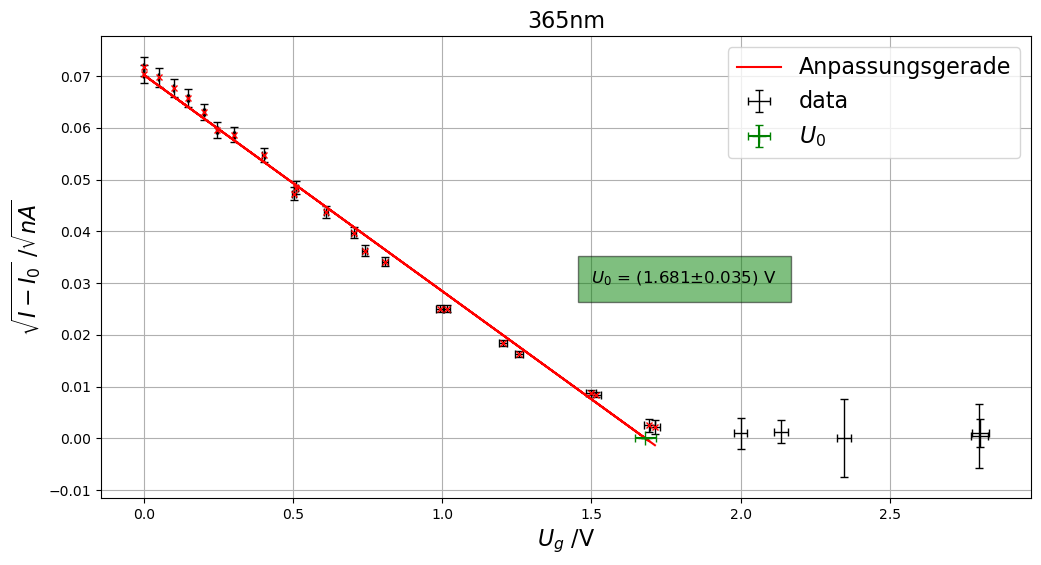

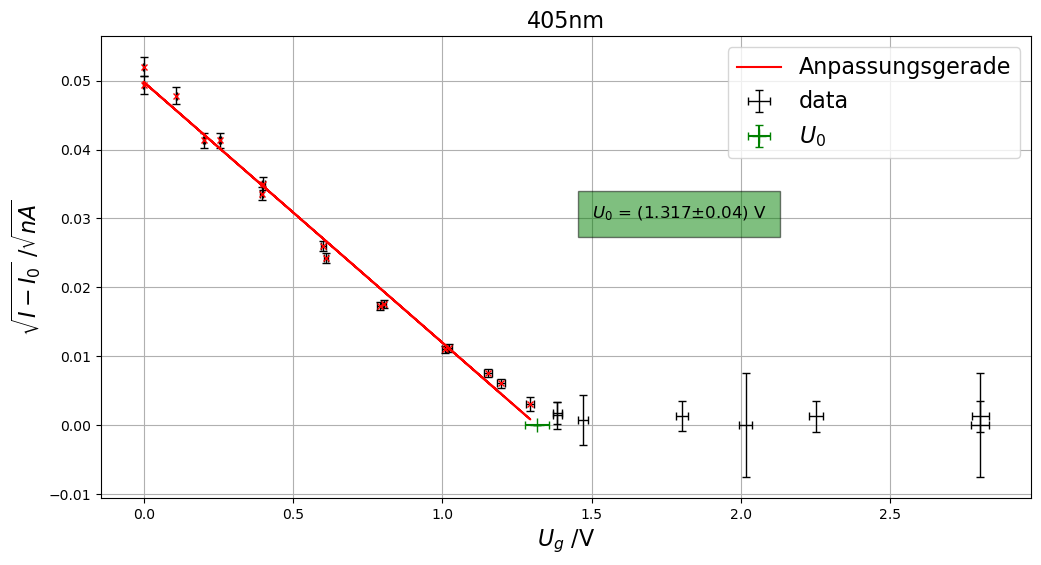

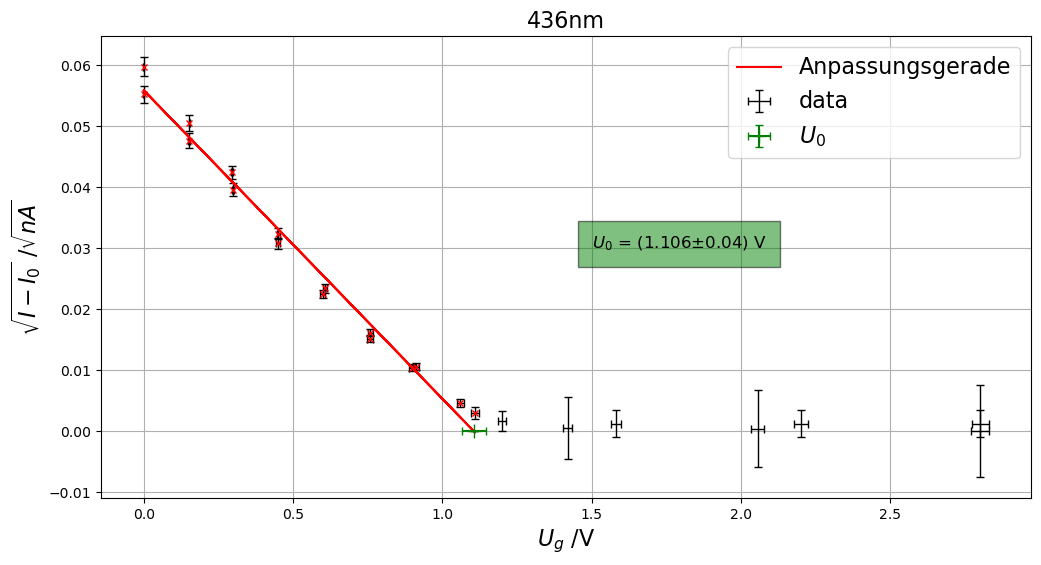

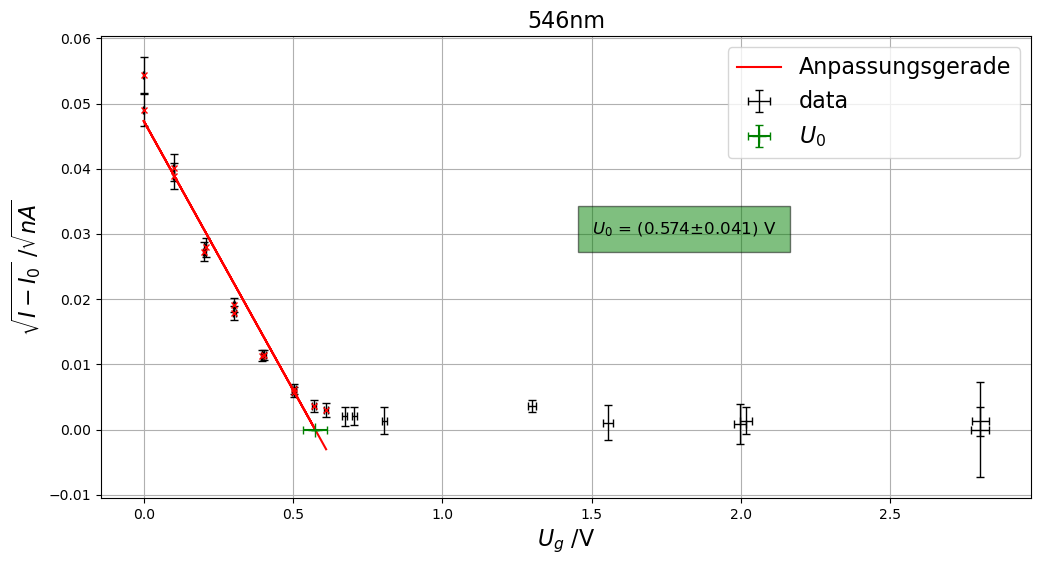

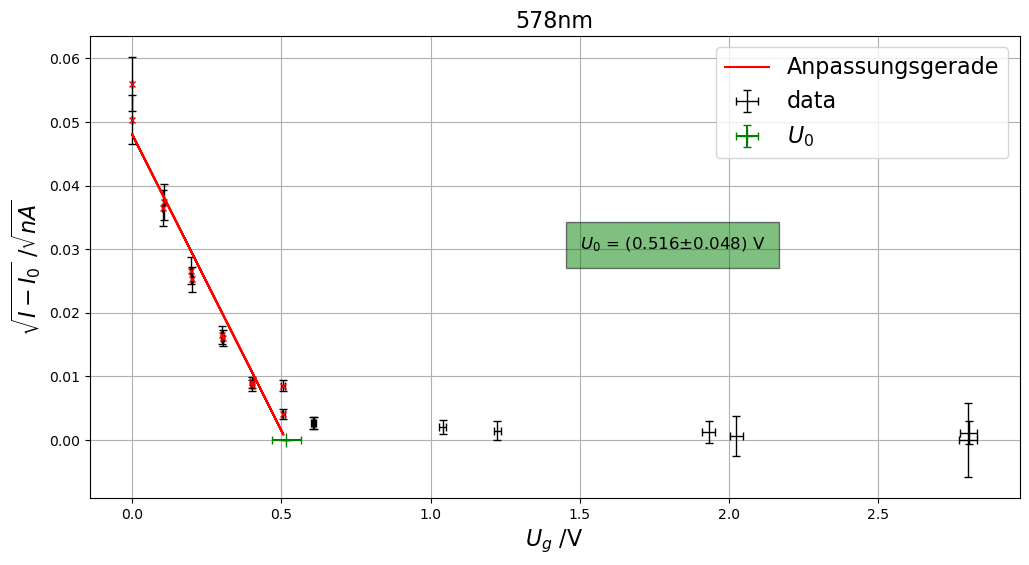

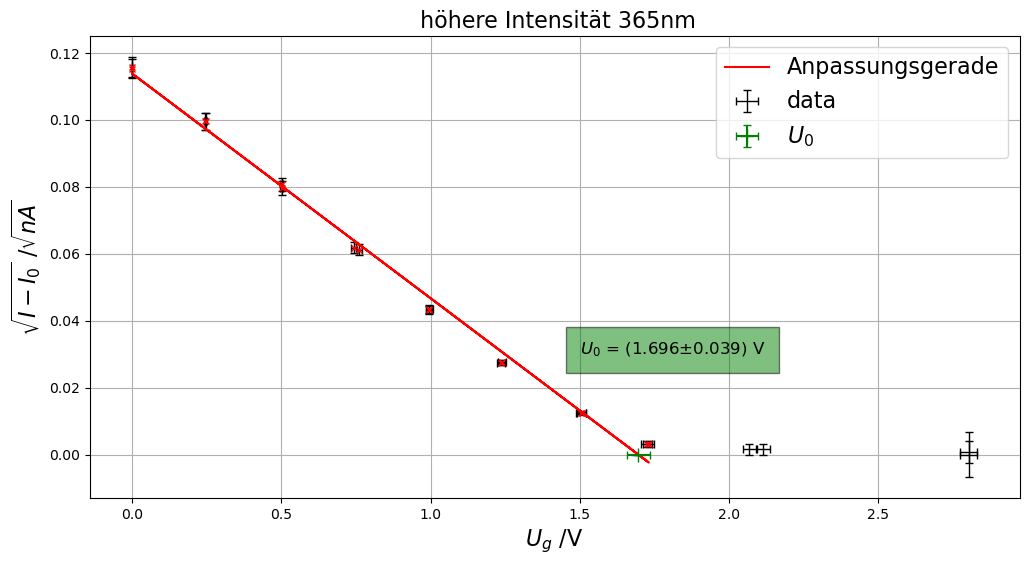

In [13]:
d1=np.loadtxt('./365.txt')
d2=np.loadtxt('./405.txt')
d3=np.loadtxt('./436.txt')
d4=np.loadtxt('./546.txt')
d5=np.loadtxt('./578.txt')
d6=np.loadtxt('./365_2.txt')
Data=[d1,d2,d3,d4,d5,d6]
WL=['365','405','436','546','578',' höhere Intensität 365']
WL2=[365,405,436,546,578,365]
U0=[1734,1384.5,1165.5,639.5,530.5,1758]
#I0=[30.75,20.05,27.25,47.8,10.1]
I0=[0.002,0.0023,0.0018,-0.0008,-0.0103,-0.009]
I0r=[]
U=[]
errU=[1,1,1,1,1,1]
I=[]
errI=[0.05,0.05,0.05,0.1,0.15,0.05]
U2=[]
I2=[]
I2_=[]
Ur=[]
Ir=[]
U2r=[]
I2r=[]
with open('u0i0.txt','w') as f:
    for h in range(0,6):
        f.write(str(WL2[h])+'\t'+str(U0[h])+'\n')
print(Data[0])
for h in range(0,6):
    U.append(Data[h][:,0])
    I0r.append(I0[h]*0.05)
    I.append(Data[h][:,1])
    Ur.append(U[h]*0.01+errU[h])
    Ir.append(I[h]*errI[h]+0.0055)
    U2.append([i*0.001 for i in U[h] if i<=U0[h]])
    U2r.append([(i*0.01+errU[h])*0.001 for i in U[h] if i<=U0[h]])
    I22=[]
    I22_=[]
    I22r=[]
    count=0
    for i in U[h]:
        if i<=U0[h]:
            I22.append(I[h][count])
            I22_.append((I[h][count]-I0[h])*0.001)
            I22r.append(Ir[h][count])
        count=count+1
    I2.append(I22)
    I2_.append(I22_)
    I2r.append(I22r)

#print(I)
for h in range(0,6):
    #Ir[h]=np.sqrt((0.5*Ir[h]*0.001/np.sqrt((I[h]-I0[h])*0.001))**2+(0.5*I0r[h]*0.001/np.sqrt((I[h]-I0[h])*0.001))**2)
    Ir[h]=Fehler_I(I0[h],I[h],Ir[h],I0r[h],U[h])
    I[h]=np.sqrt((I[h]-I0[h])*0.001)
    I2[h]=Fehler_I(I0[h],I2[h],I2r[h],I0r[h],U2[h])
    I2[h]=np.sqrt(I2_[h])
    U[h]=U[h]*0.001
    Ur[h]=Ur[h]*0.001

def funktion(x,b,m):
    y=m*x+b
    return y
U_0_save=[]
U_0_save_err=[]
print(U)
for h in range(0,6):
    s=[]
    anpassungs_werte, co_var = curve_fit(funktion, U2[h],I2[h])
    perr= np.sqrt(np.diag(co_var))
    print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte, "+/-", perr, "nm")
    #Rfit    = funktion(U2[h], *anpassungs_werte)
    Rfit=[]
    for u in U2[h]:
        Rfit.append(funktion(u, *anpassungs_werte))    
    U_0_save.append(-anpassungs_werte[0]/anpassungs_werte[1])
    U_0_save_err.append(np.sqrt((perr[0]/anpassungs_werte[1])**2+(perr[1]*anpassungs_werte[0]/(anpassungs_werte[1]**2))**2))
    plt.figure(figsize=(12,6))
    plt.title(str(WL[h])+r'nm',fontsize=16)
    G3label  = r"$U_0$ = $($" + str(np.round(U_0_save[h], 3)) + r"$\pm$" + str(np.round(U_0_save_err[h], 3)) + r"$)$ V"
    plt.text( 1.5,0.03, G3label, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
    plt.errorbar(U[h],I[h],Ir[h],Ur[h],'k.',capsize=3,elinewidth=1,markersize=0,label='data')
    plt.plot(U2[h],I2[h],'r x',markersize=5)
    plt.plot(U2[h],Rfit,'r',label='Anpassungsgerade')
    plt.errorbar(U_0_save[h],0.0,0.0,U_0_save_err[h],'g +',capsize=3,elinewidth=1.5,markersize=10,label='$U_0$')
    plt.ylabel(r'$\sqrt{I-I_0}$ /$\sqrt{nA}$',fontsize=16)
    plt.xlabel(r'$U_g$ /V',fontsize=16)
    plt.grid()
    plt.legend(fontsize=16)
    #string(n)=('%d' %n)
    plt.savefig(str(WL[h])+'nm')
print(U_0_save)
print(U_0_save_err)
#plt.plot(U2[0],np.sqrt(I2[0]),'g x')
#plt.show

In [14]:
def grad(wl,h,W_a):
    U_0=h*wl-W_a
    return U_0
V=np.array(U_0_save)
Vr=np.array(U_0_save_err)
lamb=np.array(WL2)
F=c0/(lamb*1e-9)
print(V)
anpassungs_werte, co_var = curve_fit(grad, F, V)
perr= np.sqrt(np.diag(co_var))
print("h,W_a:", anpassungs_werte*e, "+/-", perr*e, "nm")
Rfit    = grad(F, *anpassungs_werte)

[1.68086945 1.31718227 1.10595002 0.57422879 0.51614118 1.69576198]
h,W_a: [6.30968824e-34 2.51196663e-19] +/- [1.97266360e-35 1.38097164e-20] nm


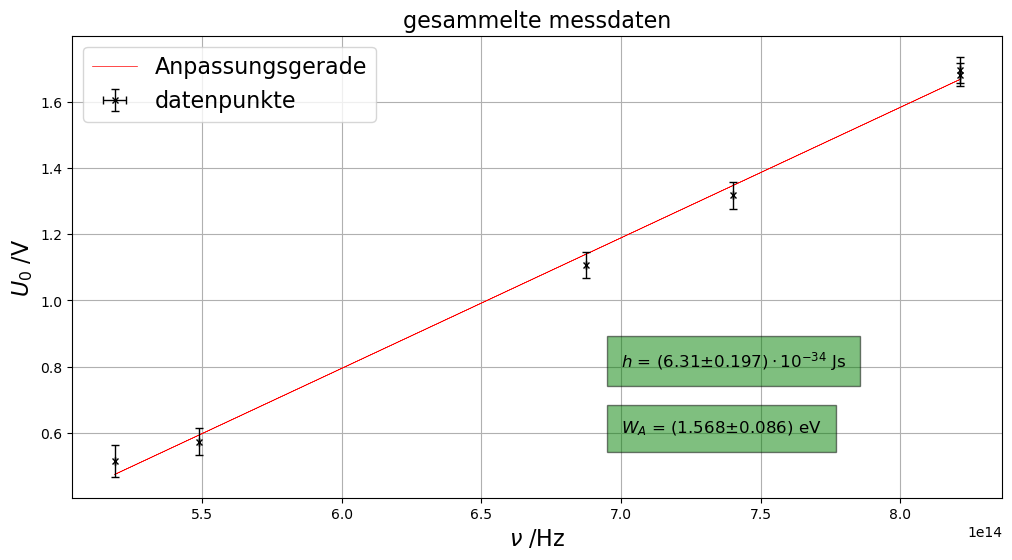

In [15]:
plt.figure(figsize=(12,6))
plt.title('gesammelte messdaten',fontsize=16)
G3label  = r"$h$ = $($" + str(np.round(anpassungs_werte[0]*e*1e34, 3)) + r"$\pm$" + str(np.round(perr[0]*e*1e34, 3)) + r"$)\cdot 10^{-34}$ Js"
plt.text( 7.0*1e14,0.8, G3label, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
G4label  = r"$W_A$ = $($" + str(np.round(anpassungs_werte[1], 3)) + r"$\pm$" + str(np.round(perr[1], 3)) + r"$)$ eV"
plt.text( 7.0*1e14,0.6, G4label, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
# plt.errorbar(U[h],I[h],Ir[h],Ur[h],'k.',capsize=3,elinewidth=1,markersize=0,label='data')
# plt.plot(U2[h],I2[h],'r x',markersize=5)
# plt.plot(U2[h],Rfit,'r',label='Anpassungsgerade')
# plt.errorbar(U_0_save[h],0.0,0.0,U_0_save_err[h],'g +',capsize=3,elinewidth=1.5,markersize=10,label='$U_0$')
plt.plot(F,Rfit,'r', linewidth=0.5,label='Anpassungsgerade')
plt.errorbar(F,V,Vr,0,'k x',capsize=3,elinewidth=1,markersize=5,label='datenpunkte')
plt.ylabel(r'$U_0$ /V',fontsize=16)
plt.xlabel(r'$\nu $ /Hz',fontsize=16)
plt.grid()
plt.legend(fontsize=16)
plt.savefig('final_h.png')

Durch die Anpassung bestimmte Parameter: [ 0.07026072 -0.04180022] +/- [0.00069239 0.0007748 ] nm
Durch die Anpassung bestimmte Parameter: [ 0.11386112 -0.06714452] +/- [0.00138312 0.0013304 ] nm


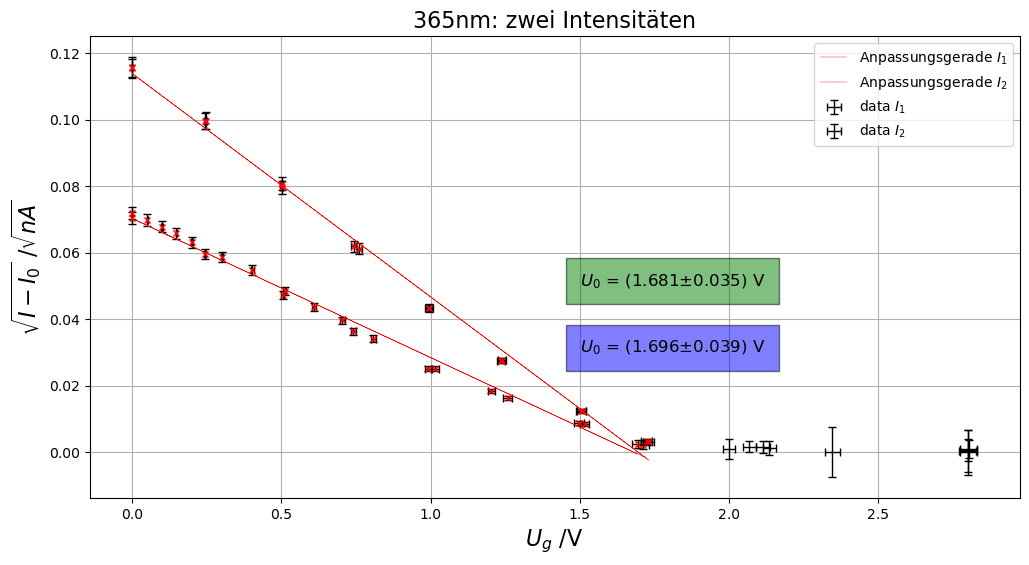

In [16]:
h=0
s=[]
anpassungs_werte1, co_var1 = curve_fit(funktion, U2[h],I2[h])
perr1= np.sqrt(np.diag(co_var1))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte1, "+/-", perr1, "nm")
#Rfit    = funktion(U2[h], *anpassungs_werte)
Rfit1=[]
for u in U2[h]:
    Rfit1.append(funktion(u, *anpassungs_werte1))    
an1=-anpassungs_werte1[0]/anpassungs_werte1[1]
an1r=np.sqrt((perr1[0]/anpassungs_werte1[1])**2+(perr1[1]*anpassungs_werte1[0]/(anpassungs_werte1[1]**2))**2)
h=5
anpassungs_werte2, co_var2 = curve_fit(funktion, U2[h],I2[h])
perr2= np.sqrt(np.diag(co_var2))
print("Durch die Anpassung bestimmte Parameter:", anpassungs_werte2, "+/-", perr2, "nm")
#Rfit    = funktion(U2[h], *anpassungs_werte)
Rfit2=[]
for u in U2[h]:
    Rfit2.append(funktion(u, *anpassungs_werte2))    
an2=-anpassungs_werte2[0]/anpassungs_werte2[1]
an2r=np.sqrt((perr2[0]/anpassungs_werte2[1])**2+(perr2[1]*anpassungs_werte2[0]/(anpassungs_werte2[1]**2))**2)
h=0
plt.figure(figsize=(12,6))
plt.title('365nm: zwei Intensitäten',fontsize=16)
G3label  = r"$U_0$ = $($" + str(np.round(an1, 3)) + r"$\pm$" + str(np.round(an1r, 3)) + r"$)$ V"
plt.text( 1.5,0.05, G3label, bbox={'facecolor': 'green', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
plt.errorbar(U[h],I[h],Ir[h],Ur[h],'k.',capsize=3,elinewidth=1,markersize=0,label='data $I_1$')
plt.plot(U2[h],I2[h],'r x',markersize=5)
plt.plot(U2[h],Rfit1,'r',linewidth=0.3,label='Anpassungsgerade $I_1$')
# plt.errorbar(an1,0.0,0.0,an1r,'g +',capsize=3,elinewidth=1.5,markersize=10,label='$U_0$ $I_1$')
h=5
G4label  = r"$U_0$ = $($" + str(np.round(an2, 3)) + r"$\pm$" + str(np.round(an2r, 3)) + r"$)$ V"
plt.text( 1.5,0.03, G4label, bbox={'facecolor': 'blue', 'alpha': 0.5, 'pad': 10}, fontsize = 12)
plt.errorbar(U[h],I[h],Ir[h],Ur[h],'k.',capsize=3,elinewidth=1,markersize=0,label='data $I_2$')
plt.plot(U2[h],I2[h],'r x',markersize=5)
plt.plot(U2[h],Rfit2,'r',linewidth=0.3,label='Anpassungsgerade $I_2$')
# plt.errorbar(an2,0.0,0.0,an2r,'b +',capsize=3,elinewidth=1.5,markersize=10,label='$U_0$ $I_2$')
plt.ylabel(r'$\sqrt{I-I_0}$ /$\sqrt{nA}$',fontsize=16)
plt.xlabel(r'$U_g$ /V',fontsize=16)
plt.grid()
plt.legend(fontsize=10)
#string(n)=('%d' %n)
plt.savefig('2_I.png')

In [6]:
with open('data.txt', 'w') as f:
    for h in range(0,6):
        f.write(str(np.round(F[h]*1e-14,3)) +'\t'+str(np.round(V[h],3)) +'$\pm$'+ str(np.round(Vr[h],3))+'\n')

In [7]:
d1=np.loadtxt('./365.txt')
d2=np.loadtxt('./405.txt')
d3=np.loadtxt('./436.txt')
d4=np.loadtxt('./546.txt')
d5=np.loadtxt('./578.txt')
d6=np.loadtxt('./365_2.txt')
Data=[d1,d2,d3,d4,d5,d6]
WL=['365','405','436','546','578',' höhere Intensität 365']
WL2=[365,405,436,546,578,365]
U0=[1734,1384.5,1165.5,639.5,530.5,1758]
#I0=[30.75,20.05,27.25,47.8,10.1]
I0=[0.002,0.0023,0.0018,-0.0008,-0.0103,-0.009]
I0r=[]
U=[]
errU=[1,1,1,1,1,1]
I=[]
errI=[0.05,0.05,0.05,0.1,0.15,0.05]
U2=[]
I2=[]
I2_=[]
Ur=[]
Ir=[]
U2r=[]
I2r=[]
for h in range(0,6):
    U.append(Data[h][:,0])
    I0r.append(I0[h]*0.05)
    I.append(Data[h][:,1])
    Ur.append(U[h]*0.01+errU[h])
    Ir.append(I[h]*errI[h]+0.0055)

In [8]:
for h in range(0,6):
    with open('./Data/'+str(WL[h])+'_.txt', 'w') as f:
        count=0
        for value in U[h]:
            f.write(str(np.round(U[h][count],3)) + '$\pm$'+ str(np.round(Ur[h][count],3))+ '\t'+str(np.round(I[h][count],3))+ '$\pm' + str(np.round(Ir[h][count],3))+'\n')
            count=count+1